# Agglomerative Cluster 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv(r'F:\Coding\Gen Ai\Machine Learning\Unsupervised\K_Means_Clustering\Mall_Customers.csv')

In [16]:
# For now we are using just 2 columns
df = df[['Annual Income (k$)', 'Spending Score (1-100)']]

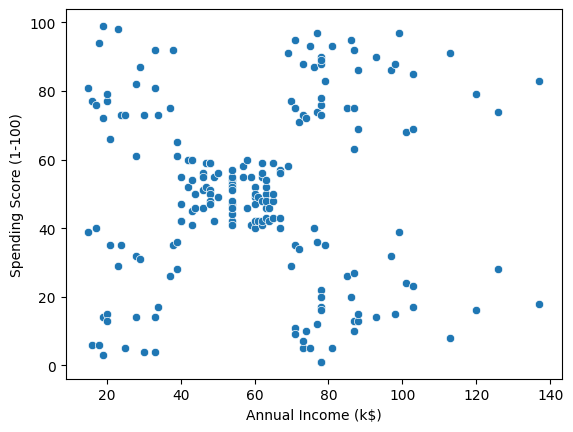

In [17]:
sns.scatterplot(df, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.show()

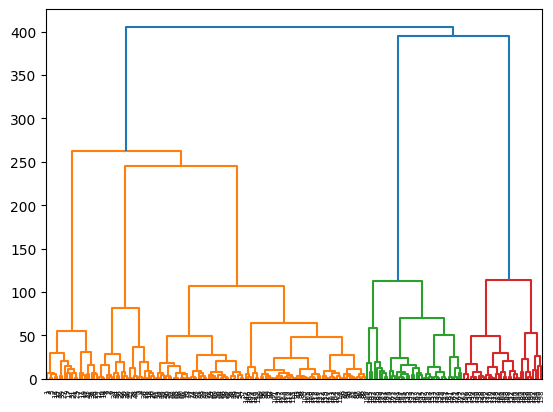

In [18]:
import scipy.cluster.hierarchy as sch

dend = sch.dendrogram(sch.linkage(df, method='ward'))

In [40]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
labels = cluster.fit_predict(df.values)

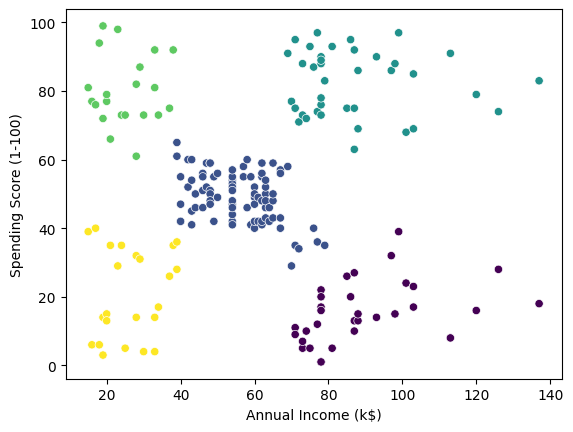

In [42]:
sns.scatterplot(df, x='Annual Income (k$)', y='Spending Score (1-100)', c=labels)
plt.show()

In [70]:
data = pd.read_csv('Country-data.csv')

In [48]:
# label encoder for country
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['country'] = le.fit_transform(data['country'])

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    int64  
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 13.2 KB


In [53]:
# Applying pca for visualization
from sklearn.decomposition import PCA

pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

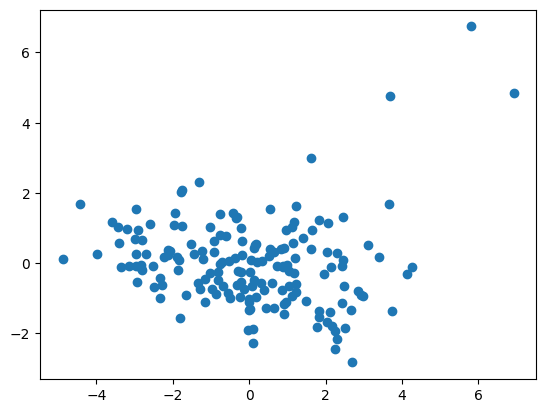

In [59]:
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1])

In [61]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_scaled)

In [63]:
pca_result[:, 0].shape

(167,)

In [ ]:
import plotly.express as px


data["PC1"] = pca_result[:, 0]
data["PC2"] = pca_result[:, 1]
data["PC3"] = pca_result[:, 2]

fig = px.scatter_3d(
    data,
    x="PC1", y="PC2", z="PC3",
    color="country",  # This will give each country a color
    title="PCA - 3D Visualization of Countries"
)
fig.show()

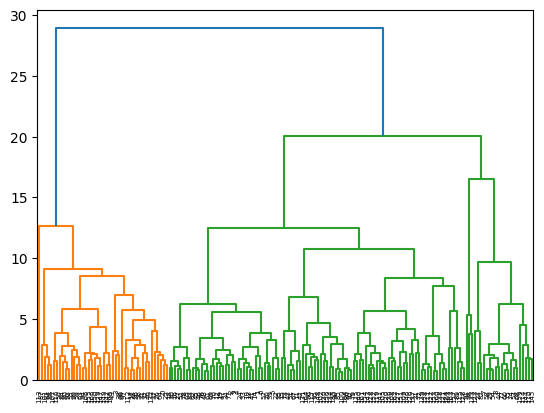

In [74]:
dendo = sch.dendrogram(sch.linkage(X_scaled, method='ward'))

In [82]:
agg2 = AgglomerativeClustering(n_clusters=2, linkage='ward')
clusters = agg2.fit_predict(X_scaled)

In [83]:
data['clusters'] = clusters

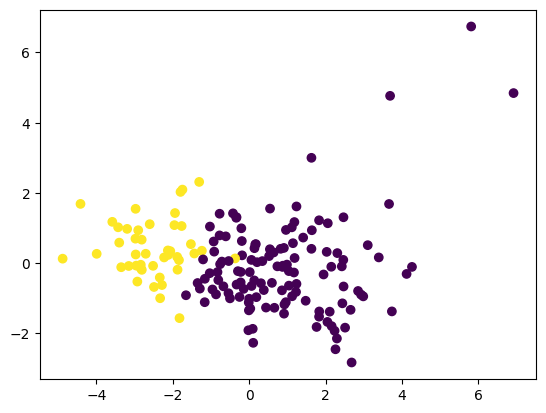

In [84]:
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=clusters)